<a href="https://colab.research.google.com/github/afauzan14/capstone1-ams/blob/main/code_capstone1_ams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok B Final Project**
| Nama | NIM | Kontribusi | Persentase |
| -------- | -------- | -------- | -------- |
| Miyatunnisa Putri Samma | 11220940000025| Scrapping, Presentator, Mencari insight | 100% |
| Alif Alamsyah  | 11220940000028| Scrapping, Preprocessing, Mencari insight | 100% |
| Ahmad Fauzan | 11220940000031| Scrapping, Preprocessing,Presentator, Mencari insight | 100% |
| Kiara Zerlin Windriyani | 11220940000038| Presentator | 100% |

# Analisis Sentimen & Tanggapan Publik di Media Sosial Terhadap Pembatasan Gratis Ongkir  Melalui Peraturan Menteri Komdigi

# **Latar Belakang**

Pemerintah menerbitkan Permen Komdigi No. 8 Tahun 2025 tentang Layanan Pos Komersial yang salah satu poin utamanya adalah Promo gratis ongkir dibatasi maksimal 3 hari per bulan, dengan tujuan mencegah perang harga tidak sehat dan melindungi UMKM dan pelaku logistik kecil. Namun, kebijakan ini memicu beragam persepsi masyarakat, khususnya terkait dampaknya pada belanja online.

**Mengapa Topik ini Penting?**
- Kebijakan ini berpotensi memengaruhi perilaku belanja online masyarakat dan ekosistem e-commerce secara luas.
- Analisis sentimen publik penting untuk memahami dampak kebijakan dan memberikan masukan konstruktif.

# Load Data

In [ ]:
!pip install squarify
!pip install Sastrawi
!pip install unidecode
!pip install bertopic

import torch
import itertools, re, pickle
import time, operator, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import networkx as nx
import squarify
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
from wordcloud import WordCloud
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

"DONE!!!"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Using device: cuda


'DONE!!!'

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/afauzan14/capstone1-ams/main/tiktok-ams-capstone1.csv")
df

,avatarThumbnail,cid,createTime,createTimeISO,diggCount,input,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,uid,uniqueId,videoWebUrl,text,"Label (1 = positif, 2 = netral, 3 = negatif)"
0,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7509100558436762375,1748348727,2025-05-27T12:25:27.000Z,0,https://www.tiktok.com/@sctv_/video/7506043543...,False,False,NaN,0.0,https://www.tiktok.com/@sctv_/video/7506043543...,7446197017703203847,joula.rantung,https://www.tiktok.com/@sctv_/video/7506043543...,🤣🤣🤣🤣🤣🤣 maybe we must ask ongkor in here,3
1,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7506044062333944584,1747637093,2025-05-19T06:44:53.000Z,6,https://www.tiktok.com/@sctv_/video/7506043543...,False,False,NaN,0.0,https://www.tiktok.com/@sctv_/video/7506043543...,6542820956922068994,artica73,https://www.tiktok.com/@sctv_/video/7506043543...,min trailer agz min,2
2,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7508994709831172885,1748324080,2025-05-27T05:34:40.000Z,0,https://www.tiktok.com/@sctv_/video/7506043543...,False,False,NaN,0.0,https://www.tiktok.com/@sctv_/video/7506043543...,6958675421827433478,rnw1267,https://www.tiktok.com/@sctv_/video/7506043543...,omegot,2
3,https://p16-common-sign-va.tiktokcdn-us.com/to...,7506056415371756306,1747639961,2025-05-19T07:32:41.000Z,9,https://www.tiktok.com/@sctv_/video/7506043543...,False,False,NaN,5.0,https://www.tiktok.com/@sctv_/video/7506043543...,6781287782930646018,secretlifeofil,https://www.tiktok.com/@sctv_/video/7506043543...,trailer agz min🥰,2
4,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7506044081106141960,1747637087,2025-05-19T06:44:47.000Z,19,https://www.tiktok.com/@sctv_/video/7506043543...,False,False,NaN,0.0,https://www.tiktok.com/@sctv_/video/7506043543...,6780885067134190594,intanurhlza,https://www.tiktok.com/@sctv_/video/7506043543...,trailer agz mana minnnn,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7505355215265284871,1747476693,2025-05-17T10:11:33.000Z,0,https://www.tiktok.com/@leo_giovannii/video/75...,False,False,NaN,0.0,https://www.tiktok.com/@leo_giovannii/video/75...,7080103343620539394,racunskincaremurce05,https://www.tiktok.com/@leo_giovannii/video/75...,peraturan apa lgi inii😅,3
5963,https://p16-common-sign-va.tiktokcdn-us.com/to...,7505328346152518418,1747470450,2025-05-17T08:27:30.000Z,0,https://www.tiktok.com/@leo_giovannii/video/75...,False,False,NaN,0.0,https://www.tiktok.com/@leo_giovannii/video/75...,6547738613940781058,masitha_nm,https://www.tiktok.com/@leo_giovannii/video/75...,pemerintah dg segala gebrakannya😭🤏,3
5964,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7505328297192129298,1747470440,2025-05-17T08:27:20.000Z,0,https://www.tiktok.com/@leo_giovannii/video/75...,False,False,NaN,0.0,https://www.tiktok.com/@leo_giovannii/video/75...,7501487753533293575,maya.al88,https://www.tiktok.com/@leo_giovannii/video/75...,berita baru ini.kk,2
5965,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7505321197568623368,1747468782,2025-05-17T07:59:42.000Z,0,https://www.tiktok.com/@leo_giovannii/video/75...,False,False,NaN,0.0,https://www.tiktok.com/@leo_giovannii/video/75...,6861824855717921793,milianlestari,https://www.tiktok.com/@leo_giovannii/video/75...,keren,1


In [ ]:
df['Label (1 = positif, 2 = netral, 3 = negatif)'].value_counts()

,count
"Label (1 = positif, 2 = netral, 3 = negatif)",
3,3154
2,2449
1,364


In [ ]:
df = df.rename(columns={'Label (1 = positif, 2 = netral, 3 = negatif)': 'label'})

In [ ]:
df_text = df[['label', 'text']]
df_text

,label,text
0,3,🤣🤣🤣🤣🤣🤣 maybe we must ask ongkor in here
1,2,min trailer agz min
2,2,omegot
3,2,trailer agz min🥰
4,2,trailer agz mana minnnn
...,...,...
5962,3,peraturan apa lgi inii😅
5963,3,pemerintah dg segala gebrakannya😭🤏
5964,2,berita baru ini.kk
5965,1,keren


In [ ]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5967 non-null   int64 
 1   text    5967 non-null   object
dtypes: int64(1), object(1)
memory usage: 93.4+ KB


In [ ]:
df_text['label'] = df_text['label'].astype('category')

In [ ]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   label   5967 non-null   category
 1   text    5967 non-null   object  
dtypes: category(1), object(1)
memory usage: 52.7+ KB


# Pre-processing

## Text Cleaning

In [ ]:
def remove_URL(tweet): # Menghapus URL
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

def remove_symbols (tweet): # Menghapus simbol
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

def case_folding(text): # Mengubah huruf yang masih uppercase menjadi lowercase
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

In [ ]:
# Visualisasi clean dataset 'full_text'
df_text['cleaning'] = df_text['text'].apply(lambda x: remove_URL(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_html(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_emoji(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_username(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_symbols(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_numbers(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: case_folding(x))

df_text

,label,text,cleaning
0,3,🤣🤣🤣🤣🤣🤣 maybe we must ask ongkor in here,maybe we must ask ongkor in here
1,2,min trailer agz min,min trailer agz min
2,2,omegot,omegot
3,2,trailer agz min🥰,trailer agz min
4,2,trailer agz mana minnnn,trailer agz mana minnnn
...,...,...,...
5962,3,peraturan apa lgi inii😅,peraturan apa lgi inii
5963,3,pemerintah dg segala gebrakannya😭🤏,pemerintah dg segala gebrakannya
5964,2,berita baru ini.kk,berita baru inikk
5965,1,keren,keren


## Penanganan Duplikasi Data

In [ ]:
df_text['cleaning'].duplicated().sum()

np.int64(472)

In [ ]:
df_text[df_text['cleaning'].duplicated(keep='first')]

,label,text,cleaning
67,2,betulll,betulll
81,2,betulll,betulll
161,2,mending up trailer agz aja min😌,mending up trailer agz aja min
217,3,@putri:sibuk banget pemerintah ngurusin hal be...,sibuk banget pemerintah ngurusin hal beginian
291,3,seneng banget bikin susah rakyat,seneng banget bikin susah rakyat
...,...,...,...
5930,2,sini aku back semua 🔥🔥🔥🔥,sini aku back semua
5944,2,pertama,pertama
5949,1,setuju,setuju
5954,1,Mantap🔥,mantap


In [ ]:
df_text = df_text.drop_duplicates(subset='cleaning', keep='first')
df_text

,label,text,cleaning
0,3,🤣🤣🤣🤣🤣🤣 maybe we must ask ongkor in here,maybe we must ask ongkor in here
1,2,min trailer agz min,min trailer agz min
2,2,omegot,omegot
3,2,trailer agz min🥰,trailer agz min
4,2,trailer agz mana minnnn,trailer agz mana minnnn
...,...,...,...
5962,3,peraturan apa lgi inii😅,peraturan apa lgi inii
5963,3,pemerintah dg segala gebrakannya😭🤏,pemerintah dg segala gebrakannya
5964,2,berita baru ini.kk,berita baru inikk
5965,1,keren,keren


## Reset Index

In [ ]:
df_text.reset_index(inplace=True, drop=True)
df_text

,label,text,cleaning
0,3,🤣🤣🤣🤣🤣🤣 maybe we must ask ongkor in here,maybe we must ask ongkor in here
1,2,min trailer agz min,min trailer agz min
2,2,omegot,omegot
3,2,trailer agz min🥰,trailer agz min
4,2,trailer agz mana minnnn,trailer agz mana minnnn
...,...,...,...
5490,3,peraturan apa lgi inii😅,peraturan apa lgi inii
5491,3,pemerintah dg segala gebrakannya😭🤏,pemerintah dg segala gebrakannya
5492,2,berita baru ini.kk,berita baru inikk
5493,1,keren,keren


In [ ]:
df_text.sample(10)

,label,text,cleaning
3031,3,KEBIJAKAN DARIMANANYA BJIRRRR,kebijakan darimananya bjirrrr
4226,3,@Mia @Angieeeee🧚‍♂️ bearti awk belanjo 3 kali ...,bearti awk belanjo kali sebulan lah
1724,2,tidakkkk😭,tidakkkk
4090,3,aduh susah hidup,aduh susah hidup
142,3,di suruh libur belanja online...😂,di suruh libur belanja online
4418,2,udah mau jam 3 trailer agz belum ada jugaa 😭😭😭,udah mau jam trailer agz belum ada jugaa
4178,3,Smua mala tunggu gratis ongkir malah meledak o...,smua mala tunggu gratis ongkir malah meledak o...
2798,3,"mending urusin jalan dulu deh, msih bnyk yg lo...",mending urusin jalan dulu deh msih bnyk yg lob...
2933,3,halah karepmu pak pak...yo wes rak belonjo...,halah karepmu pak pakyo wes rak belonjo
1719,3,Gak ada urusan yg lain selain ngurusin kyk gni...,gak ada urusan yg lain selain ngurusin kyk gnian


# Slang

In [ ]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/afauzan14/capstone1-ams/main/slang_GratisOngkir.txt

--2025-06-05 14:59:14--  https://raw.githubusercontent.com/afauzan14/capstone1-ams/main/slang_GratisOngkir.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12652 (12K) [text/plain]
Saving to: ‘data/slang_GratisOngkir.txt’

slang_GratisOngkir. 100%[===================>]  12.36K  --.-KB/s    in 0.001s  

2025-06-05 14:59:15 (15.9 MB/s) - ‘data/slang_GratisOngkir.txt’ saved [12652/12652]



In [ ]:
# File slang
slang_file = 'data/slang_GratisOngkir.txt'

# Membuat kamus slang dari file
slang_dict = {}
with open(slang_file, 'r', encoding='utf-8') as file:
    for line in file:
        if ':' in line:
            slang, standard = line.strip().split(':', 1)
            slang_dict[slang.strip()] = standard.strip()

# Manual slang
manual_slang = {
    'omegot' : 'kaget',
    'maybe' : 'mungkin',
    'we' : 'kita',
    'must' : 'harus',
    'ask' : 'tanya',
    'in' : 'di',
    'here' : 'di sini',
    'minnnn' : 'admin',
    'gak' : 'tidak',
    'kalo' : 'kalau',
    'biarin' : 'biarkan',
    'biarlah' : 'biarkan',
    'kasi' : 'beri',
    'ku' : 'aku',
    'ga' : 'tidak',
    'bener' : 'benar',
    'jdi' : 'jadi',
    'sampe' : 'sampai',
    'pake' : 'pakai',
    'gue' : 'saya',
    'ongkirnya' : 'ongkir'
}

# Update kamus slang
slang_dict.update(manual_slang)
# ==========================================

# Fungsi untuk mengganti slang dengan kata baku
def normalize_slang(text):
    words = word_tokenize(text.lower())
    return ' '.join([slang_dict.get(word, word) for word in words])

In [ ]:
# Terapkan normalisasi slang ke kolom 'cleaning'
df_text['normalized_comment'] = df_text['cleaning'].apply(normalize_slang)

# Tampilkan hasil
df_text

,label,text,cleaning,normalized_comment
0,3,🤣🤣🤣🤣🤣🤣 maybe we must ask ongkor in here,maybe we must ask ongkor in here,mungkin kita harus tanya ongkir di di sini
1,2,min trailer agz min,min trailer agz min,admin trailer asmara gen z admin
2,2,omegot,omegot,kaget
3,2,trailer agz min🥰,trailer agz min,trailer asmara gen z admin
4,2,trailer agz mana minnnn,trailer agz mana minnnn,trailer asmara gen z mana admin
...,...,...,...,...
5490,3,peraturan apa lgi inii😅,peraturan apa lgi inii,peraturan apa lagi inii
5491,3,pemerintah dg segala gebrakannya😭🤏,pemerintah dg segala gebrakannya,pemerintah dengan segala gebrakannya
5492,2,berita baru ini.kk,berita baru inikk,berita baru ini
5493,1,keren,keren,keren


In [ ]:
df_text.sample(10)

,label,text,cleaning,normalized_comment
3701,3,DPR dibatasi juga gaji n fasilitas yg biasanya...,dpr dibatasi juga gaji n fasilitas yg biasanya...,dpr dibatasi juga gaji dan fasilitas yang bias...
4589,3,kok bisa sulit rakyat,kok bisa sulit rakyat,kok bisa sulit rakyat
3348,3,mending solusi buat pengangguran pak daripada ...,mending solusi buat pengangguran pak daripada ...,lebih baik solusi buat pengangguran pak daripa...
2604,3,apalahhh ngurusi begini Kominfo ni,apalahhh ngurusi begini kominfo ni,apalahhh ngurusi begini kominfo nih
3828,3,terserah min. btw mna trailer ny,terserah min btw mna trailer ny,terserah admin btw mna trailer nya
602,2,hadir,hadir,hadir
4227,3,back to pasar 😂😂😂,back to pasar,back to pasar
2373,1,"Wah bakan irit aku ini, krna ada ongkir 5ribu ...",wah bakan irit aku ini krna ada ongkir ribu aj...,wah bakan irit aku ini karena ada ongkir ribu ...
5298,3,gedeg bgt idup di indo muak aku muaaakkk😞,gedeg bgt idup di indo muak aku muaaakkk,kesal banget idup di indonesia kesal aku muaaakkk
462,2,baru tadi sya ngsih kurir harganya 52rb sya ka...,baru tadi sya ngsih kurir harganya rb sya kasi...,baru tadi sya ngsih kurir harganya ribu sya ka...


# Stopword

In [ ]:
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_stop_words.txt

--2025-06-05 14:59:16--  https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/stopwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6446 (6.3K) [text/plain]
Saving to: ‘data/stopwords_id.txt’

stopwords_id.txt    100%[===================>]   6.29K  --.-KB/s    in 0s      

2025-06-05 14:59:16 (72.5 MB/s) - ‘data/stopwords_id.txt’ saved [6446/6446]

--2025-06-05 14:59:16--  https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_stop_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [ ]:
# Membaca file stopwords
stopword_files = ['data/stopwords_id.txt', 'data/combined_stop_words.txt']
id_stop = []
for stopword_file in stopword_files:
    with open(stopword_file, "r", encoding="utf-8", errors='replace') as file:
        id_stop.extend([word.strip().lower() for word in file.readlines()])


# Bersihkan stopwords (hapus spasi dan ubah ke huruf kecil)
id_stop = [word for word in id_stop if word] # remove empty strings

In [ ]:
# Tambahkan stopwords tambahan
additional_stopwords = {'admin', 'mh', 'nya', 'iya', 'itu', 'kah', 'dan', 'ke', 'di',
                        'sih', 'coooyyyyy', 'sukak', 'syaaa', 'hehe', 'ongkos', 'ongkir',
                        'belanja', 'gratis', 'pakai', 'dengan', 'banget', 'orang', 'ini',
                        'guyss', 'z', 'kak', 'udah', 'nih', 'k', 'negara', 'dah', 'gin', 'mah', 'lebih', 'tuh',
                        'tau', 'deh', 'x', 'lg', 'kayak', 'karna', 'dpt', 'trus', 'gada', 'ka', 'manaaaaaaaaaaa',
                        'y', 'sm', 'tpi'}
id_stop.extend(additional_stopwords)  # Gabungkan stopwords tambahan

# Fungsi untuk menghapus stopwords
def remove_custom_stopwords(text):
    words = word_tokenize(text)  # Tokenisasi teks
    return ' '.join([word for word in words if word not in id_stop])

In [ ]:
df_text['no_stop'] = df_text['normalized_comment'].apply(remove_custom_stopwords)
df_text

,label,text,cleaning,normalized_comment,no_stop
0,3,🤣🤣🤣🤣🤣🤣 maybe we must ask ongkor in here,maybe we must ask ongkor in here,mungkin kita harus tanya ongkir di di sini,
1,2,min trailer agz min,min trailer agz min,admin trailer asmara gen z admin,trailer asmara gen
2,2,omegot,omegot,kaget,kaget
3,2,trailer agz min🥰,trailer agz min,trailer asmara gen z admin,trailer asmara gen
4,2,trailer agz mana minnnn,trailer agz mana minnnn,trailer asmara gen z mana admin,trailer asmara gen
...,...,...,...,...,...
5490,3,peraturan apa lgi inii😅,peraturan apa lgi inii,peraturan apa lagi inii,peraturan inii
5491,3,pemerintah dg segala gebrakannya😭🤏,pemerintah dg segala gebrakannya,pemerintah dengan segala gebrakannya,pemerintah gebrakannya
5492,2,berita baru ini.kk,berita baru inikk,berita baru ini,berita
5493,1,keren,keren,keren,keren


# Lemmatization

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Daftar kata dasar manual
kata_dasar = ['setuju', 'sukses', 'terbaik', 'pemerataan', 'lingkungan', 'setara', 'alasan',
              'pendidikan', 'peserta', 'impian', 'kejuruan', 'menteri', 'terapkan', 'perdebatan',
              'hilangkan', 'biarkan', 'pemerintah']  # Tambahkan kata dasar manual lainnya

In [ ]:
# Fungsi stemming dengan perlindungan kata dasar
def stem_text(text):
    words = text.split()
    stemmed_words = []
    for word in words:
        stemmed = stemmer.stem(word)
        # Jika kata asli ada di kata_dasar, gunakan kata asli
        if word in kata_dasar:
            stemmed_words.append(word)
        # Jika hasil stemming malah menghapus bentuk dasar yang kamu inginkan
        elif stemmed in kata_dasar:
            stemmed_words.append(stemmed)
        else:
            stemmed_words.append(stemmed)
    return ' '.join(stemmed_words)

In [ ]:
# Terapkan stemming pada kolom 'no_stopwords'
df_text['stemmed_text'] = df_text['no_stop'].apply(stem_text)

In [ ]:
df_text

,label,text,cleaning,normalized_comment,no_stop,stemmed_text
0,3,🤣🤣🤣🤣🤣🤣 maybe we must ask ongkor in here,maybe we must ask ongkor in here,mungkin kita harus tanya ongkir di di sini,,
1,2,min trailer agz min,min trailer agz min,admin trailer asmara gen z admin,trailer asmara gen,trailer asmara gen
2,2,omegot,omegot,kaget,kaget,kaget
3,2,trailer agz min🥰,trailer agz min,trailer asmara gen z admin,trailer asmara gen,trailer asmara gen
4,2,trailer agz mana minnnn,trailer agz mana minnnn,trailer asmara gen z mana admin,trailer asmara gen,trailer asmara gen
...,...,...,...,...,...,...
5490,3,peraturan apa lgi inii😅,peraturan apa lgi inii,peraturan apa lagi inii,peraturan inii,atur ini
5491,3,pemerintah dg segala gebrakannya😭🤏,pemerintah dg segala gebrakannya,pemerintah dengan segala gebrakannya,pemerintah gebrakannya,pemerintah gebrak
5492,2,berita baru ini.kk,berita baru inikk,berita baru ini,berita,berita
5493,1,keren,keren,keren,keren,keren


# **Insight**

## **Distribusi Sentimen Publik**

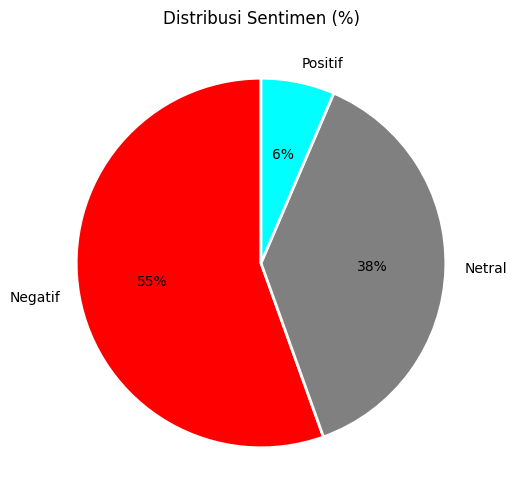

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# Assume df_text is your DataFrame.
# For example, if it NOW contains text labels:
# data = {'label': ['Negatif', 'Netral', 'Positif', 'Negatif', 'Negatif']}
# df_text = pd.DataFrame(data)
# Or, if it still contains numbers (the previous code should have worked, but let's ensure robustness):
# data = {'label': [3, 2, 1, 3, 3]}
# df_text = pd.DataFrame(data)


# 1. Define the colors for your desired text labels
#    Make sure these keys match exactly what's in sentimen_counts.index OR what numeric_to_text_mapping produces.
sentiment_colors = {'Positif': 'cyan', 'Negatif': 'red', 'Netral': 'gray'}

# 2. Define the mapping from numeric labels to text labels
#    This will be used IF your data contains numbers.
numeric_to_text_mapping = {1: 'Positif', 2: 'Netral', 3: 'Negatif'}

# 3. Calculate sentiment counts
sentimen_counts = df_text['label'].value_counts()

# 4. Prepare the labels and corresponding colors for the pie chart
final_pie_labels = []
final_pie_colors = []

for label_in_data in sentimen_counts.index:
    text_label = ''
    if isinstance(label_in_data, (int, float)): # Check if the label from data is a number
        text_label = numeric_to_text_mapping.get(label_in_data, str(label_in_data)) # Convert number to text
    else: # If it's already text (like 'Negatif')
        text_label = str(label_in_data)

    final_pie_labels.append(text_label)
    # Get the color for this text label; use a default if not found to prevent KeyErrors
    final_pie_colors.append(sentiment_colors.get(text_label, 'lightgrey'))


# 5. Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentimen_counts.values, # The actual count values
    labels=final_pie_labels, # The processed text labels
    autopct='%1.0f%%',
    startangle=90,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    colors=final_pie_colors # The corresponding colors for the text labels
)
plt.title('Distribusi Sentimen (%)')
plt.show()

### **Interpretasi Visualisasi:**

- **Mayoritas Sentimen Negatif (55%):** Lebih dari separuh masyarakat (55%) menunjukkan sentimen negatif terhadap aturan pembatasan gratis ongkir. Ini kemungkinan besar karena bisa berdampak pada daya beli masyarakat, terutama di daerah dengan ongkir tinggi.

- **Sentimen Netral Signifikan (38%):** Sekitar 38% masyarakat bersikap netral. Ini bisa berarti masyarakat belum paham sepenuhnya tentang aturan ini atau merasa aturan ini tidak terlalu memengaruhi mereka secara langsung.

- **Sentimen Positif Minim (6%):** Hanya 6% yang menunjukkan sentimen positif. Ini mungkin mencerminkan sebagian kecil masyarakat, seperti pelaku usaha logistik atau kurir, yang merasa diuntungkan karena aturan ini melindungi kesejahteraan kurir dan mendorong persaingan sehat.

## Analisis Sentimen Publik

In [ ]:
# Buat DataFrame baru untuk label positif dan negatif
df_positif = df_text[df_text['label'] == 1]
df_netral = df_text[df_text['label'] == 2]
df_negatif = df_text[df_text['label'] == 3]

### Sentimen Positif

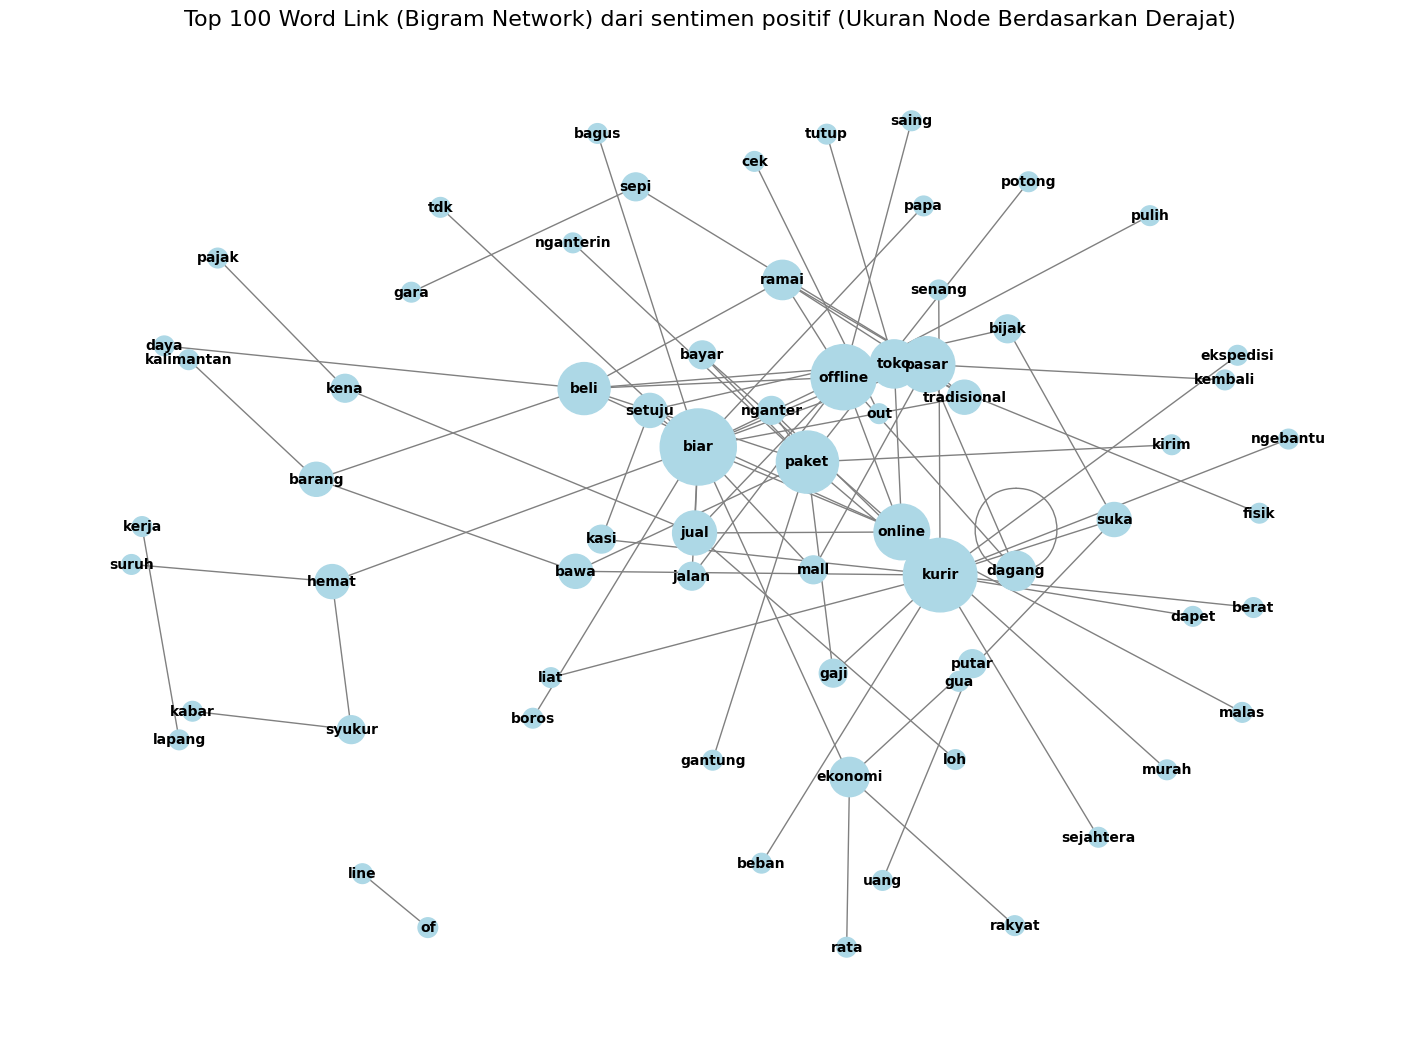

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Ambil teks komentar dengan label i
# Pastikan df_positif sudah terdefinisi sebelumnya, contoh:
# df_positif = pd.DataFrame({'stemmed_text': ['contoh teks satu', 'teks contoh dua', 'kalimat ketiga contoh']})
texts = df_positif['stemmed_text'].astype(str).str.lower().tolist()

# Gunakan CountVectorizer untuk bigram
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)
X = vectorizer.fit_transform(texts)
bigrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Gabungkan bigram dan frekuensinya
bigram_freq = list(zip(bigrams, counts))
bigram_freq_sorted = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# Ambil 50 bigram teratas (ubah jumlah sesuai kebutuhan)
top_n = 100
top_bigrams = [b[0] for b in bigram_freq_sorted[:top_n]]
edges = [tuple(b.split()) for b in top_bigrams]

# Buat graph dari bigram
G1 = nx.Graph()
G1.add_edges_from(edges)

# Hitung derajat setiap node
degrees = [G1.degree(node) for node in G1.nodes()]

# Tentukan faktor skala untuk ukuran node (sesuaikan sesuai kebutuhan)
scale_factor = 200

# Sesuaikan ukuran node berdasarkan derajatnya
node_sizes = [degree * scale_factor for degree in degrees]

# Visualisasi
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G1, k=0.6, seed=42) # k mengatur jarak antar node
nx.draw(
    G1, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=node_sizes, # Gunakan ukuran node yang sudah disesuaikan
    font_size=10,
    font_weight='bold'
)
plt.title(f"Top {top_n} Word Link (Bigram Network) dari sentimen positif (Ukuran Node Berdasarkan Derajat)", fontsize=16)
plt.show()

In [ ]:
# Cek kata apa yang paling banyak punya edge (koneksi).
import networkx as nx

centrality = nx.degree_centrality(G1)
sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('biar', 0.22058823529411764),
 ('kurir', 0.20588235294117646),
 ('offline', 0.16176470588235295),
 ('paket', 0.14705882352941177),
 ('pasar', 0.11764705882352941),
 ('online', 0.11764705882352941),
 ('beli', 0.10294117647058823),
 ('toko', 0.08823529411764705),
 ('jual', 0.07352941176470588),
 ('ramai', 0.058823529411764705)]

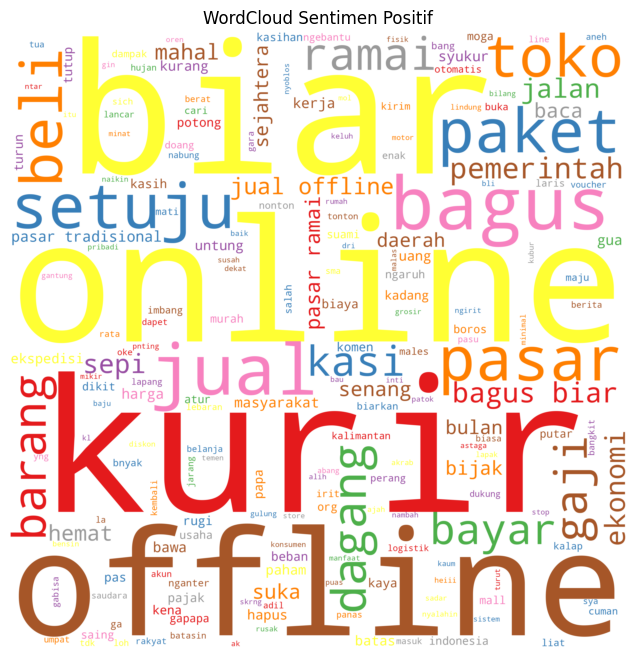

In [ ]:
# Gabungkan semua teks dari kolom 'stemmed_text' dalam DataFrame df_positif
all_text_s1 = ' '.join(word for word in df_positif['stemmed_text'].astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(all_text_s1)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.margins(x=0, y=0)
plt.show()

#### **Interpretasi Visualisasi Sentimen Positif:**

- **Makna kata-kata pada Word Cloud:**
  - Beberapa kata seperti `pasar`, `offline`, `biar` (biarin/biarkan), `toko`, dan `ramai` menunjukkan bahwa masyarakat melihat kebijakan ini sebagai peluang untuk memperkuat pasar tradisional dan toko offline, yang selama ini kalah bersaing dengan e-commerce akibat promo gratis ongkir masif dan menunjukkan dukungan agar toko fisik mendapat perhatian lebih, dengan harapan kebijakan ini menciptakan keseimbangan kompetisi antara penjual online dan offline.
  - Beberapa kata seperti `bagus`, `setuju` menunjukkan bahwa masyarakat melihat kebijakan ini sebagai peluang untuk menghemat pengeluaran.

- **Makna kata-kata pada Word Link:**
  - Keterhubungan antara kata `biar`, `hemat`, dan `syukur` menunjukkan bahwa masyarakat merasa bersyukur karena kebijakan pengaturan diskon ongkir memungkinkan mereka berhemat. Hal ini terjadi karena sebelumnya, gratis ongkir sering mendorong belanja berlebihan, termasuk pembelian barang yang tidak benar-benar dibutuhkan, tanpa mempertimbangkan kebutuhan sebenarnya.
  - Keterhubungan kata `biar`, `offline`, `toko`, `pasar`, dan `tradisional` menunjukkan bahwa masyarakat merasa senang karena pengaturan diskon ongkir melalui kebijakan Komdigi mendorong banyak orang untuk beralih ke pasar tradisional atau toko offline, yang dianggap mendapat keuntungan dari berkurangnya dominasi belanja online.
  - Keterhubungan kata `biar`, `bagus`, `setuju`, `ekonomi`, dan `rata` menunjukkan bahwa masyarakat merasa senang karena pengaturan diskon ongkir melalui kebijakan Komdigi dianggap mendorong pertumbuhan ekonomi yang lebih merata, dengan memberikan peluang yang lebih adil bagi berbagai pelaku usaha, termasuk toko offline dan pasar tradisional.
  - Keterhubungan kata `kurir` dan `sejahtera` menunjukkan bahwa masyarakat menganggap pengaturan diskon ongkir melalui kebijakan Komdigi dapat meningkatkan kesejahteraan kurir, dengan adanya upaya untuk memastikan pendapatan mereka tetap terjaga.

### Sentimen Negatif

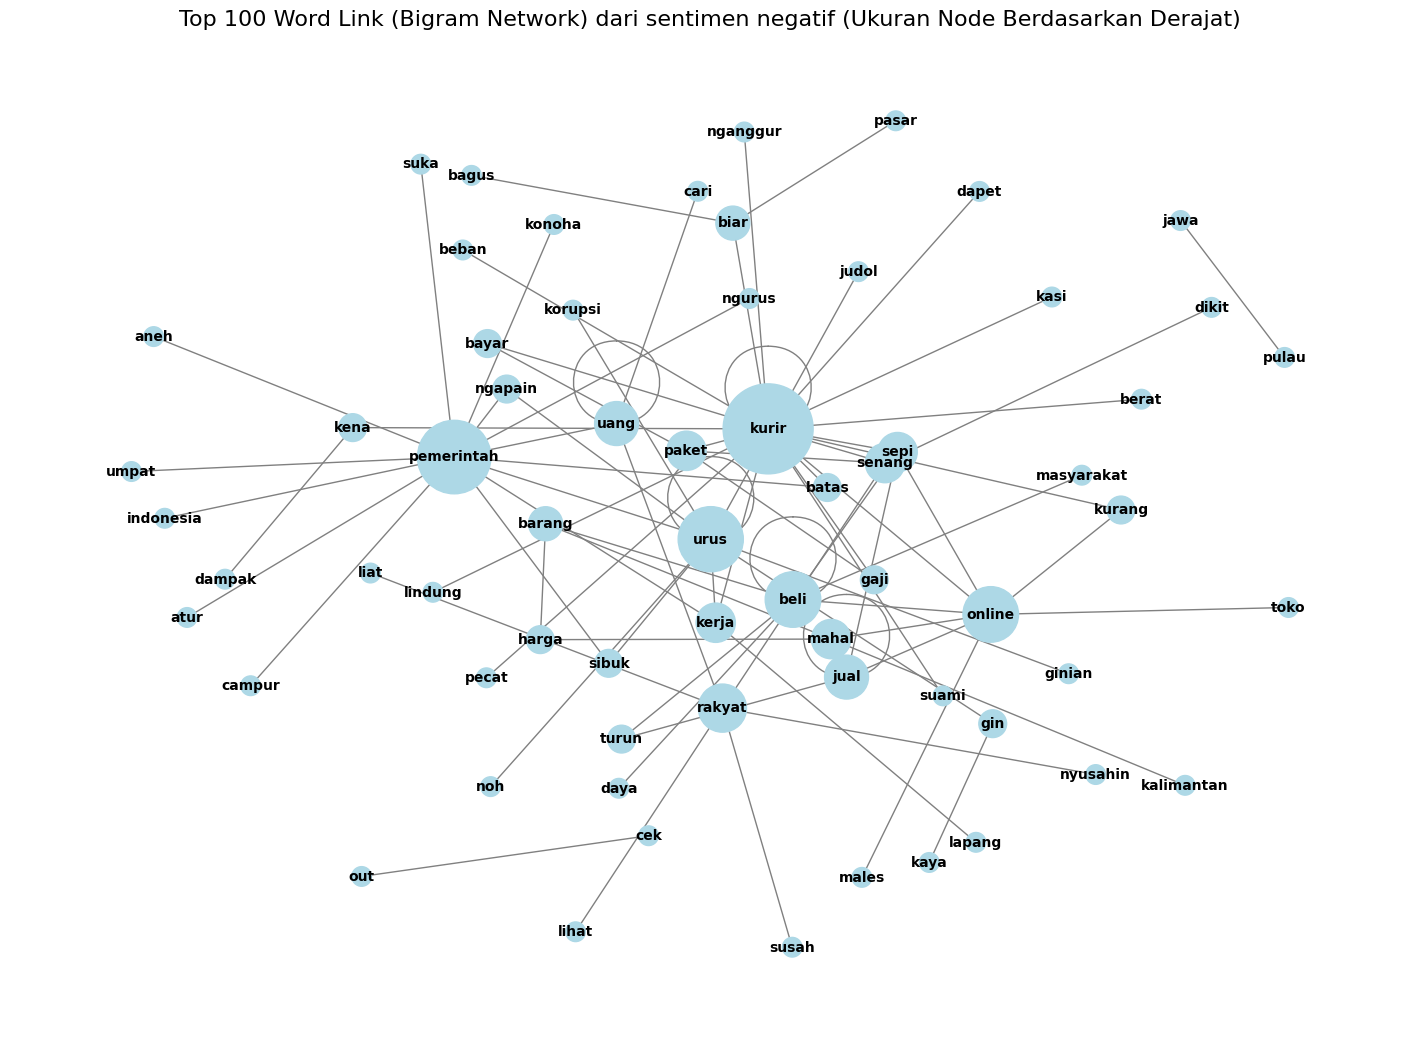

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Ambil teks komentar dengan label i
# Pastikan df_negatif sudah terdefinisi sebelumnya, contoh:
# df_negatif = pd.DataFrame({'stemmed_text': ['contoh teks satu', 'teks contoh dua', 'kalimat ketiga contoh']})
texts = df_negatif['stemmed_text'].astype(str).str.lower().tolist()

# Gunakan CountVectorizer untuk bigram
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)
X = vectorizer.fit_transform(texts)
bigrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Gabungkan bigram dan frekuensinya
bigram_freq = list(zip(bigrams, counts))
bigram_freq_sorted = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# Ambil 50 bigram teratas (ubah jumlah sesuai kebutuhan)
top_n = 100
top_bigrams = [b[0] for b in bigram_freq_sorted[:top_n]]
edges = [tuple(b.split()) for b in top_bigrams]

# Buat graph dari bigram
G3 = nx.Graph()
G3.add_edges_from(edges)

# Hitung derajat setiap node
degrees = [G3.degree(node) for node in G3.nodes()]

# Tentukan faktor skala untuk ukuran node (sesuaikan sesuai kebutuhan)
scale_factor = 200

# Sesuaikan ukuran node berdasarkan derajatnya
node_sizes = [degree * scale_factor for degree in degrees]

# Visualisasi
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G3, k=0.6, seed=42) # k mengatur jarak antar node
nx.draw(
    G3, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=node_sizes, # Gunakan ukuran node yang sudah disesuaikan
    font_size=10,
    font_weight='bold'
)
plt.title(f"Top {top_n} Word Link (Bigram Network) dari sentimen negatif (Ukuran Node Berdasarkan Derajat)", fontsize=16)
plt.show()

In [ ]:
# Cek kata apa yang paling banyak punya edge (koneksi).
import networkx as nx

centrality = nx.degree_centrality(G3)
sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('kurir', 0.328125),
 ('pemerintah', 0.21875),
 ('urus', 0.171875),
 ('beli', 0.125),
 ('online', 0.125),
 ('rakyat', 0.09375),
 ('jual', 0.078125),
 ('uang', 0.078125),
 ('kerja', 0.0625),
 ('senang', 0.0625)]

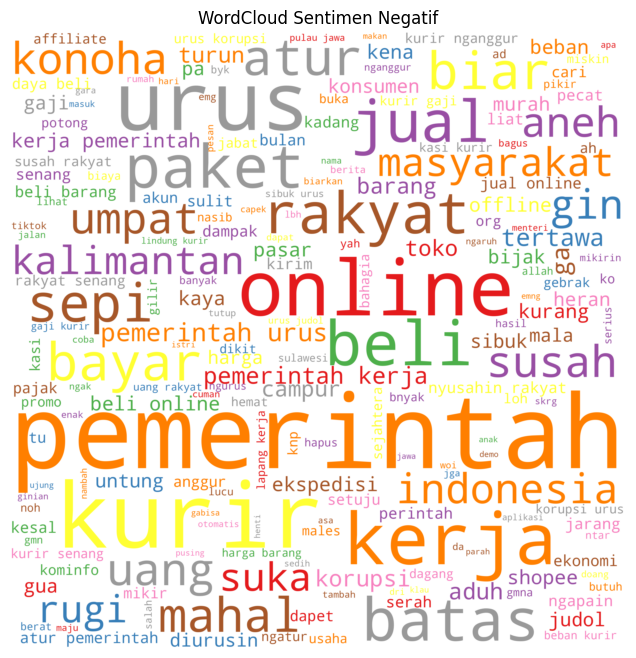

In [ ]:
# Gabungkan semua teks dari kolom 'stemmede_text' dalam DataFrame df_negatif
all_text_s3 = ' '.join(word for word in df_negatif['stemmed_text'].astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(all_text_s3)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.margins(x=0, y=0)
plt.show()

#### **Interpretasi Visualisasi Sentimen Negatif:**

- **Makna kata-kata pada Word Cloud:**
  - Kata-kata seperti `susah`, `mahal`, `beli`, `online`, `sepi` dan `rakyat` menunjukkan bahwa masyarakat merasa terbebani dan khawatir kebijakan ini membuat belanja online menjadi lebih mahal dan sulit, sehingga memengaruhi daya beli masyarakat umum.
  - Kata `pemerintah`, `atur`, `korupsi`, dan `konoha` mengindikasikan bahwa masyarakat tidakpuas terhadap pemerint karena kebijakan ini kurang tepat atau bahkan dianggap merugikan dan juga dibandingkan mengurusi hal seperti gratis ongkir lebih baik mengurusi masalah seperti korupsi.
  - Kata `kurir`, `gaji`, `kasih`, dan `kerja` mencerminkan kekhawatiran bahwa kebijakan ini dapat memperburuk pendapatan dan kondisi kerja kurir.

- **Makna kata-kata pada Word Link:**

  - Keterhubungan kata `kurir`,`susah`, `gaji`, dan `kasih` menunjukkan bahwa masyarakat khawatir kebijakan pengaturan diskon ongkir dapat menurunkan pendapatan kurir, sehingga membuat mereka sulit memenuhi kebutuhan sehari-hari.
  - Keterhubungan kata `beli`, `online`, dan `mahal` mengindikasikan bahwa masyarakat merasa belanja online menjadi lebih mahal akibat kebijakan ini, sehingga memengaruhi kebiasaan belanja mereka.
  - Keterhubungan kata `pemerintah`, `atur`, dan `ngurus` menunjukkan bahwa masyarakat kesal dengan aksi pemerintah membuat kebijakan pembatasan gratis ongkir yang mana hal seperti ini sepele, masyarakat lebih berharap bahwa pemerintah seharusnya lebih fokus menangani masalah lain yang lebih penting dan urgent.
  - Keterhubungan kata `Kalimantan`, dan `mahal` mengindikasikan bahwa masyarakat di daerah terpencil merasa biaya pengiriman menjadi lebih mahal, memperparah kesenjangan akses belanja online.

### Sentimen Netral

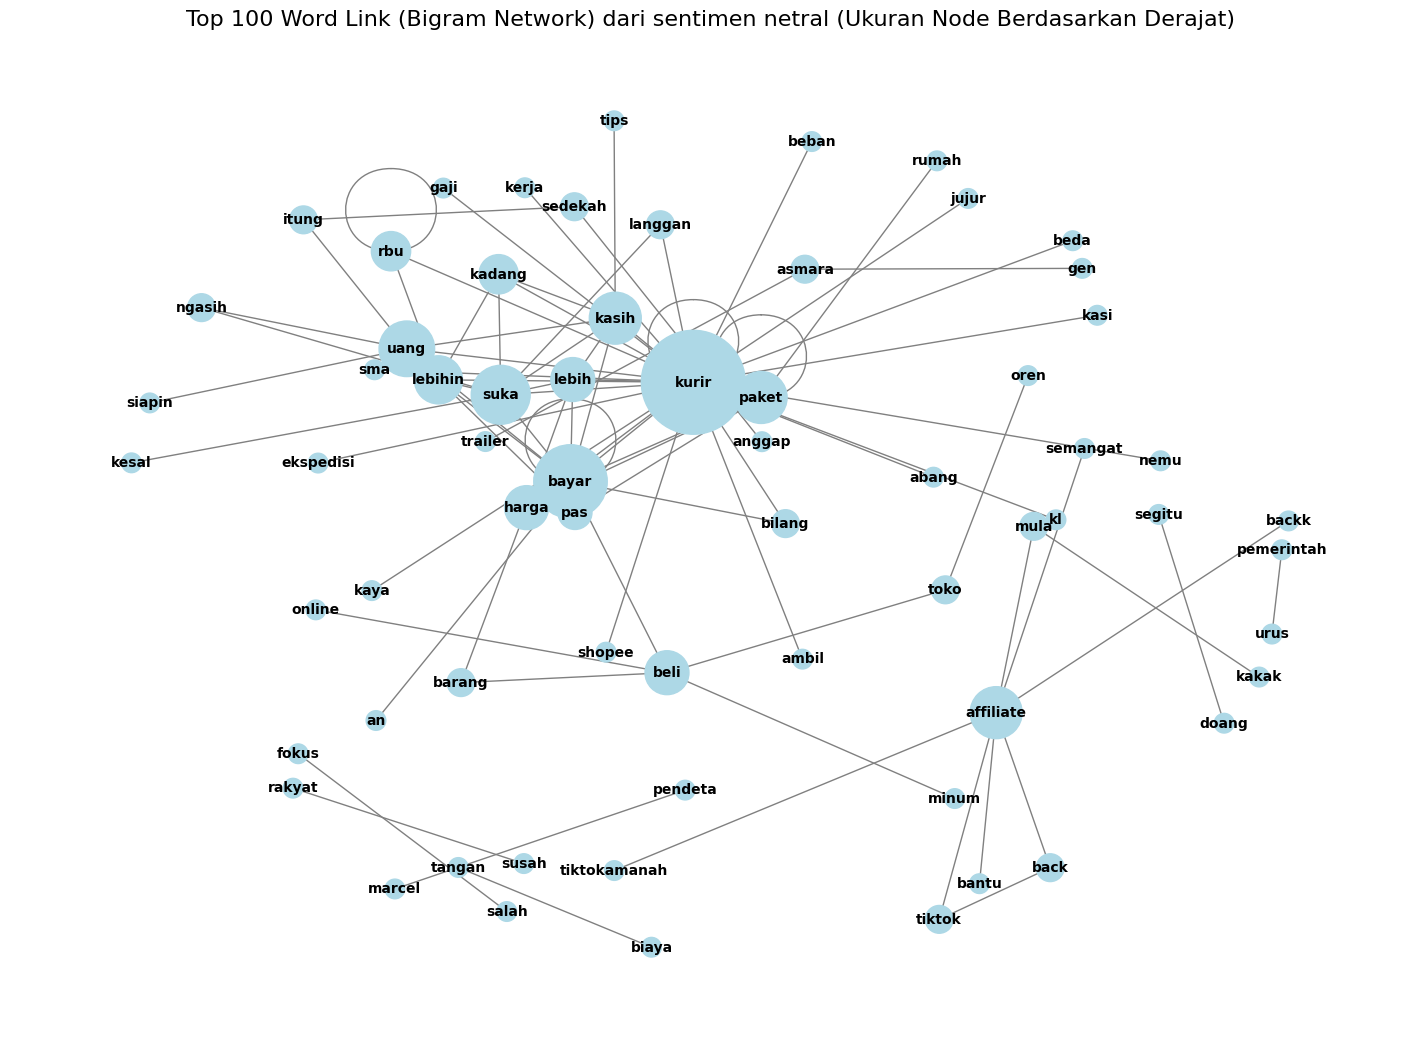

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Ambil teks komentar dengan label i
# Pastikan df_netral sudah terdefinisi sebelumnya, contoh:
# df_netral = pd.DataFrame({'stemmed_text': ['contoh teks satu', 'teks contoh dua', 'kalimat ketiga contoh']})
texts = df_netral['stemmed_text'].astype(str).str.lower().tolist()

# Gunakan CountVectorizer untuk bigram
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)
X = vectorizer.fit_transform(texts)
bigrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Gabungkan bigram dan frekuensinya
bigram_freq = list(zip(bigrams, counts))
bigram_freq_sorted = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# Ambil 50 bigram teratas (ubah jumlah sesuai kebutuhan)
top_n = 100
top_bigrams = [b[0] for b in bigram_freq_sorted[:top_n]]
edges = [tuple(b.split()) for b in top_bigrams]

# Buat graph dari bigram
G2 = nx.Graph()
G2.add_edges_from(edges)

# Hitung derajat setiap node
degrees = [G2.degree(node) for node in G2.nodes()]

# Tentukan faktor skala untuk ukuran node (sesuaikan sesuai kebutuhan)
scale_factor = 200

# Sesuaikan ukuran node berdasarkan derajatnya
node_sizes = [degree * scale_factor for degree in degrees]

# Visualisasi
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G2, k=0.6, seed=42) # k mengatur jarak antar node
nx.draw(
    G2, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=node_sizes, # Gunakan ukuran node yang sudah disesuaikan
    font_size=10,
    font_weight='bold'
)
plt.title(f"Top {top_n} Word Link (Bigram Network) dari sentimen netral (Ukuran Node Berdasarkan Derajat)", fontsize=16)
plt.show()

In [ ]:
# Cek kata apa yang paling banyak punya edge (koneksi).
import networkx as nx

centrality = nx.degree_centrality(G2)
sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('kurir', 0.42424242424242425),
 ('bayar', 0.21212121212121213),
 ('suka', 0.13636363636363635),
 ('uang', 0.12121212121212122),
 ('affiliate', 0.10606060606060606),
 ('kasih', 0.10606060606060606),
 ('paket', 0.10606060606060606),
 ('lebihin', 0.09090909090909091),
 ('lebih', 0.07575757575757576),
 ('harga', 0.07575757575757576)]

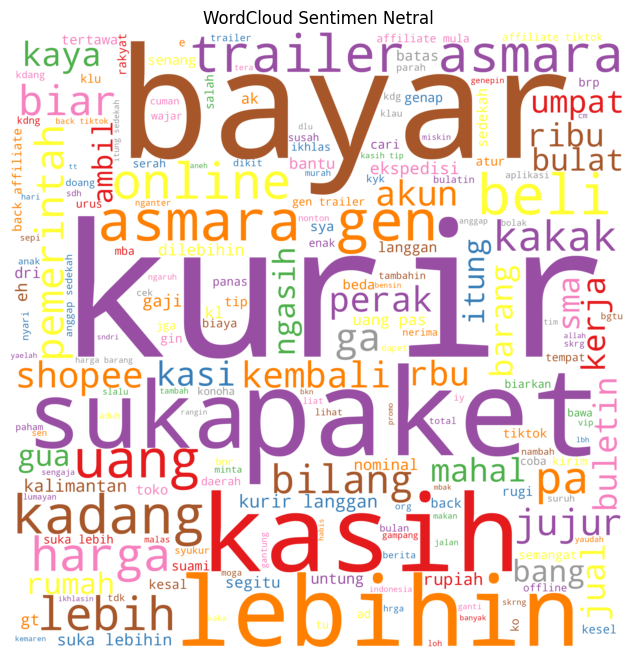

In [ ]:
# Gabungkan semua teks dari kolom 'stemmede_text' dalam DataFrame df_netral
all_text_s2 = ' '.join(word for word in df_netral['stemmed_text'].astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(all_text_s2)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Netral')
plt.margins(x=0, y=0)
plt.show()

#### **Interpretasi Visualisasi Sentimen Netral:**

- **Makna kata-kata pada Word Cloud:**
  - Kata-kata seperti `kurir`, `bayar`, `kasih`, dan `suka` menunjukkan bahwa masyarakat membahas interaksi dengan kurir secara netral, termasuk praktik memberikan lebih sebagai tanda terima kasih atau sedekah, tanpa emosi yang kuat.
  - Kata `online`, `shopee`, dan `beli` mengindikasikan bahwa beberapa masyarakat merasa tidak masalah dan tetap melakukan cek out.
  - Kata `asmara`, `gen`, `trailer`, dan `affiliate` mencerminkan adanya topik tidak relevan, seperti diskusi tentang acara tv karena salah satu sumber data ini merupakan akun tiktok stasiun tv yang akan menayangkan series sinetron atau promosi TikTok, yang tidak berkaitan langsung dengan kebijakan Komdigi.

- **Makna kata-kata pada Word Link:**

  - Keterhubungan antara kata `kurir`, `paket`, `suka`, `lebih`, `lebihin`, `kasih`, dan `bayar` menunjukkan bahwa masyarakat membahas secara netral tentang proses pengiriman dan pembayaran jasa kurir, termasuk praktik memberikan lebih sebagai tanda terima kasih atau sedekah, tanpa menunjukkan emosi kuat.
  - Keterhubungan kata `affiliate`, `tiktok`, dan `bantu` mencerminkan adanya topik tidak relevan, seperti promosi afiliasi TikTok, yang tidak terkait langsung dengan kebijakan Komdigi.
  - Hubungan antara kata `trailer`, `asmara`, dan `gen` mengindikasikan adanya topik yang tidak relevan, seperti pembahasan acara televisi, karena salah satu sumber data berasal dari akun TikTok stasiun TV yang akan menayangkan sinetron yang tidak berhubungan dengan kebijakan Komdigi.

## Tren Percakapan Publik di Media Sosial

In [ ]:
dfm = df.copy()

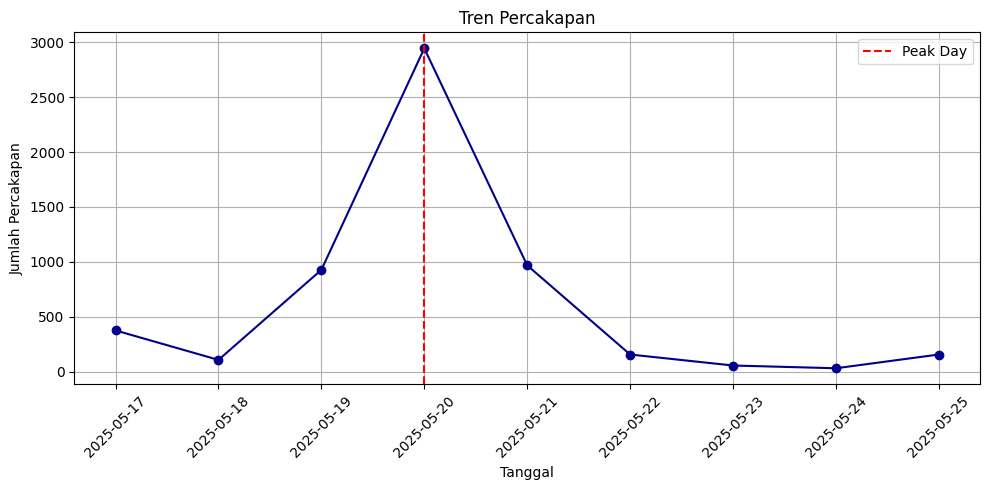

Penurunan hari +1: 32.93%
Penurunan hari +2: 5.37%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

# Pastikan kolom waktu bertipe datetime
dfm['createTimeISO'] = pd.to_datetime(dfm['createTimeISO'])

# Hitung jumlah percakapan per hari
daily_counts = dfm.groupby(dfm['createTimeISO'].dt.date).size()

# Tentukan tanggal puncak
peak_date = pd.to_datetime('2025-05-20').date()

# Ambil periode +/- 5 hari dari tanggal puncak
start_date = peak_date - timedelta(days=5)
end_date = peak_date + timedelta(days=5)

window_counts = daily_counts.loc[start_date:end_date]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(window_counts.index, window_counts.values, marker='o', linestyle='-', color='darkblue')
plt.axvline(peak_date, color='red', linestyle='--', label='Peak Day')
plt.title('Tren Percakapan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Percakapan')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Rasio decay 1-2 hari setelah puncak (opsional, insight numerik)
day1 = peak_date + timedelta(days=1)
day2 = peak_date + timedelta(days=2)
decay_1 = daily_counts.get(day1, 0) / daily_counts.get(peak_date, 1)
decay_2 = daily_counts.get(day2, 0) / daily_counts.get(peak_date, 1)

print(f"Penurunan hari +1: {decay_1:.2%}")
print(f"Penurunan hari +2: {decay_2:.2%}")


* **Puncak Perhatian Publik**: Jumlah perbincangan mencapai puncak pada 20 Mei 2025 dengan sekitar 3000 perbincangan, menandakan adanya peristiwa signifikan seperti pengumuman peraturan. Puncak ini mencerminkan tingkat kepedulian publik yang tinggi pada saat kebijakan diperkenalkan atau diperdebatkan.
* **Peningkatan Bertahap Sebelum Puncak**: Percakapan meningkat secara bertahap dari 17 Mei (sekitar 500) hingga 19 Mei, menunjukkan bahwa publik mulai menemukan hal yang menarik perhatian, kemungkinan akibat bocoran informasi atau antisipasi terhadap perubahan kebijakan. Ini mengindikasikan fase awal pembentukan opini publik.
* **Penurunan Cepat Pasca-Puncak**: Setelah puncak pada 20 Mei, jumlah perbincangan menurun drastis pada 21 Mei (sekitar 1500) dan terus menurun hingga stabil di bawah 500 pada 25 Mei. Penurunan ini menunjukkan minat publik mereda dengan cepat, mungkin karena kurangnya informasi lanjutan atau pergeseran fokus ke isu lain.
* **Sifat Sementara Isu**: Pola lonjakan tajam diikuti penurunan cepat mengindikasikan bahwa topik ini bersifat sementara, dipengaruhi oleh reaksi langsung terhadap kebijakan tanpa dampak berkelanjutan pada perbincangan. Hal ini dapat menjadi peluang untuk memanfaatkan momen puncak dengan komunikasi efektif.

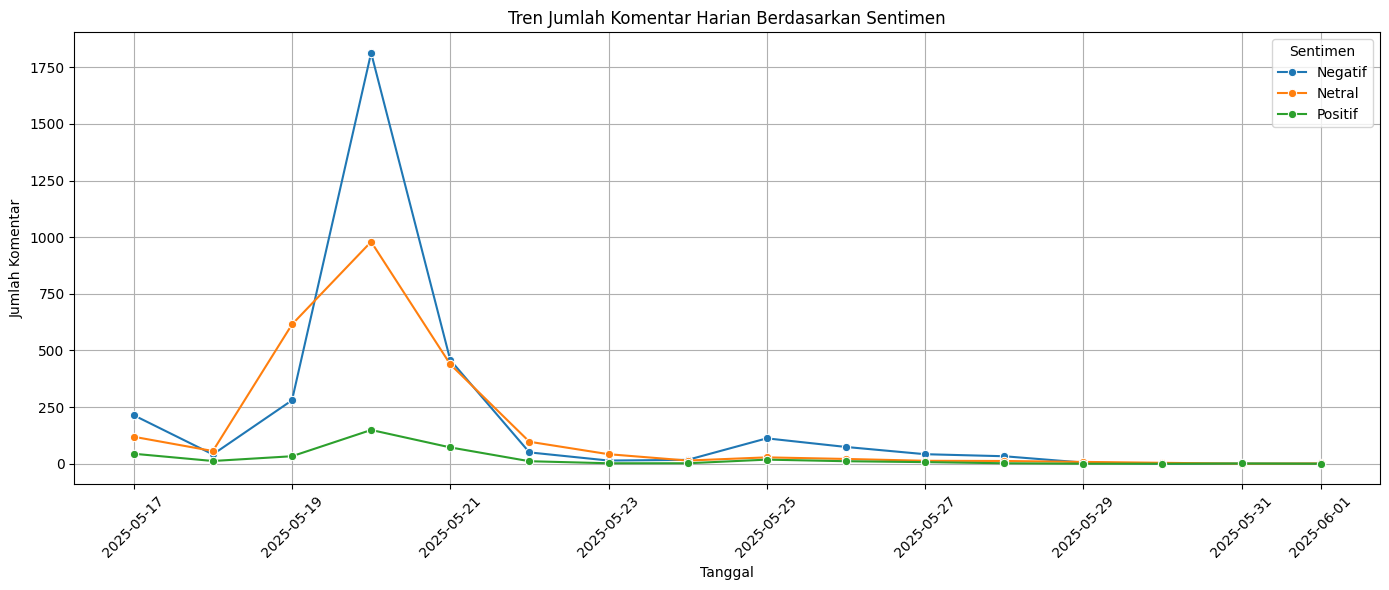

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan kolom waktu bertipe datetime
dfm['createTimeISO'] = pd.to_datetime(dfm['createTimeISO'])

# Ekstrak tanggal (tanpa jam)
dfm['date'] = dfm['createTimeISO'].dt.date

# Peta label ke nama sentimen
sentiment_map = {1: 'Positif', 2: 'Netral', 3: 'Negatif'}
dfm['sentiment'] = dfm['label'].map(sentiment_map)

# Hitung jumlah komentar per hari per sentimen
sentiment_trend = dfm.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Visualisasi tren harian berdasarkan sentimen
plt.figure(figsize=(14, 6))

# Plot garis per sentimen
for sentiment_category in sentiment_trend.columns:
    sns.lineplot(data=sentiment_trend, x=sentiment_trend.index, y=sentiment_category, marker='o', label=sentiment_category)

# Atur tampilan grafik
plt.title('Tren Jumlah Komentar Harian Berdasarkan Sentimen')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Sentimen')
plt.show()

* **Lonjakan Sentimen Negatif pada Puncak**: Sentimen negatif mendominasi dengan puncak 1750 komentar pada 21 Mei 2025, menunjukkan penolakan publik yang kuat terhadap kebijakan ini. Lonjakan ini kemungkinan dipicu oleh pengumuman atau persepsi awal yang negatif, memerlukan perhatian khusus untuk klarifikasi.
* **Keterlibatan Sentimen Netral**: Sentimen netral mencapai 1000 komentar pada puncak, mencerminkan diskusi publik yang belum memihak atau masih mencari pemahaman. Tingkat keterlibatan ini menunjukkan adanya kelompok yang terbuka untuk dialog atau menunggu informasi lebih lanjut.
* **Minimnya Sentimen Positif**: Sentimen positif hanya mencapai 250 komentar, mengindikasikan dukungan terbatas terhadap peraturan ini. Rendahnya dukungan positif menyoroti tantangan dalam membangun narasi yang menguntungkan bagi kebijakan ini di mata publik.
* **Penurunan Minat Publik**: Semua sentimen menurun drastis dan stabil di bawah 100 komentar hingga 1 Juni 2025, menandakan minat publik yang cepat mereda setelah puncak. Hal ini mengisyaratkan bahwa isu ini bersifat sementara, tetapi memerlukan pendekatan strategis untuk menjaga perhatian.
* **Sentimen Negatif Tetap Relevan**: Meski perbincangan mereda, sentimen negatif tetap sedikit lebih dominan dibandingkan lainnya, menunjukkan bahwa ketidakpuasan dasar masih ada di kalangan tertentu. Menunjukkan perlunya tindakan lanjutan untuk mengatasi akar masalah.

## Persebaran Sentimen Berdasarkan Waktu

In [ ]:
dft = df.copy()

<Figure size 1200x600 with 0 Axes>

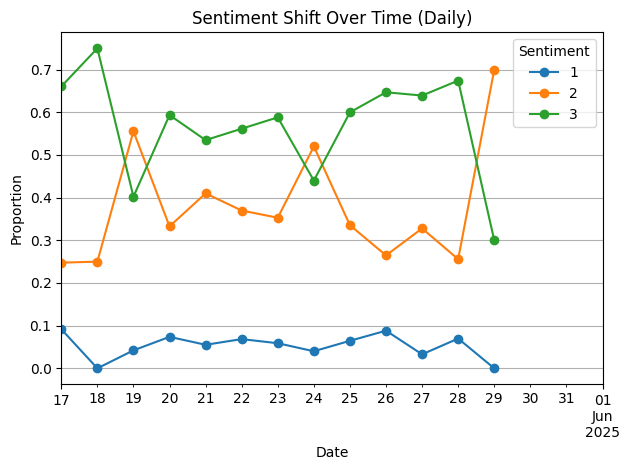

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom waktu sudah dalam datetime
dft['createTimeISO'] = pd.to_datetime(dft['createTimeISO'])

# Copy the 'label' column from df_text to dft
dft['label'] = df_text['label']

# Set as index
dft = dft.set_index('createTimeISO')

# Hitung jumlah komentar per hari per label
sentiment_shift = dft.groupby([dft.index.date, 'label']).size().unstack(fill_value=0)

# Normalisasi agar jadi proporsi per hari
sentiment_shift = sentiment_shift.div(sentiment_shift.sum(axis=1), axis=0)

# Konversi kembali index ke datetime untuk plot
sentiment_shift.index = pd.to_datetime(sentiment_shift.index)

# Plot
plt.figure(figsize=(12, 6))
sentiment_shift.plot(kind='line', marker='o')
plt.title('Sentiment Shift Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.grid(True)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

1. Sentimen Positif (Label 1 - Biru) Rendan dan stabil
  * Selalu di bawah 10%, cenderung stabil tanpa lonjakan.
  * Ini menunjukkan bahwa komentar bersifat positif sangat sedikit dan tidak mengalami peningkatan signifikan selama rentang waktu ini.

2. Sentimen Netral (Label 2 - Oranye) Fluktuatif
  * Berkisar antara 25–55%, mengalami fluktuasi yang lebih besar dibanding sentimen lain.
  * Beberapa hari seperti 19 dan 24 Mei, proporsinya melonjak, mengindikasikan topik netral (mungkin informatif atau deskriptif) menjadi lebih banyak dibicarakan.

3. Sentimen Negatif (Label 3 - Hijau) Dominan
  * Secara konsisten mendominasi sepanjang periode, dengan proporsi sekitar 50–70% hampir setiap hari.
  * Menunjukkan bahwa mayoritas komentar di video yang dianalisis cenderung bersifat negatif selama periode tersebut.
Selalu di bawah 10%, cenderung stabil tanpa lonjakan.

## Topic Modelling

### Positif

In [ ]:
text_pos = df_text[df_text['label'] == 1]

In [ ]:
texts1 = text_pos['stemmed_text']
texts1

,stemmed_text
54,beban kurir gimanasi buka syukur kurir dapet i...
61,beban kuriraku kurir senang bawa banyakbanyak ...
62,papa hapus biar jual online sepi kurir kerja
106,suami kurir berat paket paket gaji
133,beban woy gaji kurir gantung paket kirim
...,...
5474,hebat
5479,syukur kabar umkn daerah
5481,senang dukung kurir
5485,mantap kewa jual


In [ ]:
texts1 = texts1.astype(str).tolist()

In [ ]:
# Inisialisasi model UMAP dengan random_state
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=37)

# Inisialisasi model clustering HDBSCAN dengan random_state
hdbscan_model = HDBSCAN(min_cluster_size=10,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Inisialisasi BERTopic dengan model yang sudah disetel random_state
topic_model1 = BERTopic(
    language="indonesian",
    calculate_probabilities=True,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
)

# Fit model
topics, probs = topic_model1.fit_transform(texts1)

# Tampilkan topik dominan
topic_model1.get_topic_info()


2025-06-05 15:07:44,973 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

2025-06-05 15:08:02,098 - BERTopic - Embedding - Completed ✓
2025-06-05 15:08:02,099 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-05 15:08:08,725 - BERTopic - Dimensionality - Completed ✓
2025-06-05 15:08:08,727 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-05 15:08:08,752 - BERTopic - Cluster - Completed ✓
2025-06-05 15:08:08,756 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-05 15:08:08,775 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,32,-1_pemerintah_jual_barang_batasin,"[pemerintah, jual, barang, batasin, bayar, kas...","[kasih untung nyalahin pemerintah, heiii jelas..."
1,0,122,0_hemat_bagus_biar_baca,"[hemat, bagus, biar, baca, syukur, setuju, bul...","[bagus biar, bagus hemat, bagus biar hemat]"
2,1,100,1_offline_online_jual_biar,"[offline, online, jual, biar, dagang, beli, to...","[offline, offline, offline]"
3,2,54,2_kurir_paket_gaji_bawa,"[kurir, paket, gaji, bawa, kasi, sejahtera, ba...","[untung kurir nganter paket bawa, beban kurir ..."
4,3,35,3_pasar_biar_ramai_tradisional,"[pasar, biar, ramai, tradisional, kena, mall, ...","[setuju biar pasar tradisional ramai, biar pas..."
5,4,11,4_toko_bagus_kadang_jalan,"[toko, bagus, kadang, jalan, biar, mager, halm...","[bagus biar tdk mager jalan mall pasar toko, b..."


In [ ]:
X =  topic_model1.get_topic_info()
X.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,32,-1_pemerintah_jual_barang_batasin,"[pemerintah, jual, barang, batasin, bayar, kas...","[kasih untung nyalahin pemerintah, heiii jelas..."
1,0,122,0_hemat_bagus_biar_baca,"[hemat, bagus, biar, baca, syukur, setuju, bul...","[bagus biar, bagus hemat, bagus biar hemat]"
2,1,100,1_offline_online_jual_biar,"[offline, online, jual, biar, dagang, beli, to...","[offline, offline, offline]"
3,2,54,2_kurir_paket_gaji_bawa,"[kurir, paket, gaji, bawa, kasi, sejahtera, ba...","[untung kurir nganter paket bawa, beban kurir ..."
4,3,35,3_pasar_biar_ramai_tradisional,"[pasar, biar, ramai, tradisional, kena, mall, ...","[setuju biar pasar tradisional ramai, biar pas..."
5,4,11,4_toko_bagus_kadang_jalan,"[toko, bagus, kadang, jalan, biar, mager, halm...","[bagus biar tdk mager jalan mall pasar toko, b..."


In [ ]:
topic_model1.visualize_topics().show()

In [ ]:
topic_model1.visualize_barchart(top_n_topics=5)

* **Penghematan Jadi Prioritas**: Sebagian publik melihat pembatasan ongkir sebagai peluang untuk lebih hemat, dengan sikap positif terhadap pengelolaan biaya. Menunjukkan adanya apresiasi terhadap kebijakan yang mendorong pengendalian pengeluaran, terutama di kalangan konsumen yang sadar biaya.
* **Perbandingan Online dan Offline**: Diskusi tentang pilihan belanja online vs. offline mencerminkan fleksibilitas masyarakat dalam menyesuaikan strategi belanja, dengan fokus pada aktivitas jual-beli yang hemat. Menunjukkan ada adopsi yang adaptif terhadap perubahan kebijakan.
* **Kekhawatiran terhadap Kurir**: Empati terhadap kurir muncul karena khawatir pendapatan mereka terdampak akibat penurunan belanja online, menunjukkan perhatian sosial yang tetap ada meski sentimen positif dominan. Ini bisa menjadi dasar untuk mendukung pekerja logistik.
* **Pasar Tradisional sebagai Solusi**: Pasar tradisional dipandang sebagai alternatif yang didukung, dengan potensi meningkatkan aktivitas ekonomi lokal. Dukungan ini mengindikasikan peluang untuk memperkuat sektor informal sebagai tulang punggung ekonomi.
* **Dukungan terhadap Toko Offline**: Toko offline dilihat sebagai opsi positif, dengan harapan dapat kembali ramai seperti sebelumnya, mencerminkan nostalgia dan kepercayaan masyarakat terhadap belanja langsung. Ini bisa didorong dengan promosi atau insentif lokal.

### Netral

In [ ]:
text_net = df_text[df_text['label'] == 2]

In [ ]:
texts2 = text_net['stemmed_text']
texts2

,stemmed_text
1,trailer asmara gen
2,kaget
3,trailer asmara gen
4,trailer asmara gen
5,trailer asmara gen miin
...,...
5475,keduaa
5478,folow bre like
5488,bantu mula
5492,berita


In [ ]:
texts2 = texts2.astype(str).tolist()

In [ ]:
# Inisialisasi model UMAP dengan random_state
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=37)

# Inisialisasi model clustering HDBSCAN dengan random_state
hdbscan_model = HDBSCAN(min_cluster_size=10,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Inisialisasi BERTopic dengan model yang sudah disetel random_state
topic_model2 = BERTopic(
    language="indonesian",
    calculate_probabilities=True,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
)

# Fit model
topics, probs = topic_model2.fit_transform(texts2)

# Tampilkan topik dominan
topic_model2.get_topic_info()


2025-06-05 15:08:10,231 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/66 [00:00<?, ?it/s]

2025-06-05 15:08:14,547 - BERTopic - Embedding - Completed ✓
2025-06-05 15:08:14,549 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-05 15:08:22,670 - BERTopic - Dimensionality - Completed ✓
2025-06-05 15:08:22,671 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-05 15:08:22,976 - BERTopic - Cluster - Completed ✓
2025-06-05 15:08:22,981 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-05 15:08:23,045 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,701,-1_kurir_paket_suka_bayar,"[kurir, paket, suka, bayar, kasih, harga, lebi...","[kasih uang pas, kadang sma harga barang, bnr ..."
1,0,139,0_nonton_serah_buletin_genap,"[nonton, serah, buletin, genap, gimna, samaa, ...","[nonton, nonton, nonton abis]"
2,1,106,1____,"[, , , , , , , , , ]","[, , ]"
3,2,81,2_kurir_bayar_gaji_paket,"[kurir, bayar, gaji, paket, uang, pas, lebihin...",[kurir bilang bayar ikhlas kurir gaji paket ru...
4,3,77,3_trailer_gen_asmara_manaa,"[trailer, gen, asmara, manaa, bolak, agzz, tak...","[trailer, cari trailer asmara gen trailer, asm..."
5,4,58,4_sekolah_nanggung_sukses_segitu,"[sekolah, nanggung, sukses, segitu, ko, bantu,...","[tamat sekolah, bulat angka ajar sekolah kl, b..."
6,5,52,5_kasih_syukur_baik_terimakasih,"[kasih, syukur, baik, terimakasih, sehat, teri...","[kasih, kasih, kasih]"
7,6,46,6_bayar_biaya_tangan_uang,"[bayar, biaya, tangan, uang, lumayan, beli, ga...","[bayar, bayar bayar, bayar]"
8,7,40,7_online_biar_offline_donk,"[online, biar, offline, donk, hobi, untung, ra...","[online lebihin, biar online, online online]"
9,8,39,8_ak_ynk_akhu_ribu,"[ak, ynk, akhu, ribu, bayar, pas, commerce, ng...",[pernahh bayar uangkhu akhu bayar orang nylono...


In [ ]:
topic2 = topic_model2.get_topic_info()
topic2.iloc[2]

,2
Topic,1
Count,106
Name,1____
Representation,"[, , , , , , , , , ]"
Representative_Docs,"[, , ]"


In [ ]:
topic_model2.visualize_topics().show()

In [ ]:
topic_model2.visualize_barchart(top_n_topics=6)

* **Fokus Netral pada Biaya**: Diskusi tentang biaya (bayar, mahal) tetap ada dalam nada netral, mencerminkan pertimbangan praktis masyarakat terhadap pengeluaran tanpa mengambil sikap tegas. Ini menunjukkan adanya ruang untuk edukasi lebih lanjut tentang manfaat kebijakan ini terhadap pengelolaan biaya.
* **Perhatian pada Kurir dan Logistik**: Perhatian netral terhadap kurir dan paket mengindikasikan diskusi objektif tentang dampak kebijakan pada logistik, tanpa bias positif atau negatif yang kuat. Hal ini bisa menjadi peluang untuk melibatkan kurir dalam dialog guna memahami kebutuhan mereka.
* **Pergeseran ke Hiburan**: Banyak diskusi netral beralih ke topik hiburan seperti sinetron Gen Z, menunjukkan perhatian publik yang terpecah dan menurunnya fokus pada isu ongkir. Ini mengisyaratkan bahwa kebijakan ini mungkin tidak lagi menjadi prioritas utama, memerlukan strategi untuk menarik kembali perhatian.
* **Solusi E-commerce VIP**: Ide netral untuk membeli paket VIP di e-commerce (seperti Shopee) sebagai solusi gratis ongkir menawarkan opsi praktis yang diterima masyarakat. Pengembangan kolaborasi dengan platform e-commerce bisa memperkuat adopsi solusi ini di kalangan konsumen.
* **Topik Motivasi Terpisah**: Sentimen netral juga mencakup pembahasan motivasi atau kehidupan sehari-hari yang tidak terkait ongkir, menunjukkan bahwa sebagian publik lebih fokus pada aspek pribadi daripada kebijakan. Ini menandakan perlunya pendekatan yang lebih personal dalam sosialisasi kebijakan.

### Negatif

In [ ]:
text_neg = df_text[df_text['label'] == 3]

In [ ]:
texts3 = text_neg['stemmed_text']
texts3

,stemmed_text
0,
7,sibuk pemerintah urus
8,atur
9,urus allah gamau rakyat bahagia
10,diurusin umpat
...,...
5486,puspita rusak bahagia ja pemerintah
5487,dah alih pasar berangkat
5489,gmv turun tambah atur
5490,atur ini


In [ ]:
texts = texts3.astype(str).tolist()

In [ ]:
# Inisialisasi model UMAP dengan random_state
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=42)

# Inisialisasi model clustering HDBSCAN dengan random_state
hdbscan_model = HDBSCAN(min_cluster_size=10,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Inisialisasi BERTopic dengan model yang sudah disetel random_state
topic_model3 = BERTopic(
    language="indonesian",
    calculate_probabilities=True,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
)

# Fit model
topics, probs = topic_model3.fit_transform(texts3)

# Tampilkan topik dominan
topic_model3.get_topic_info()


2025-06-05 15:08:23,595 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/96 [00:00<?, ?it/s]

2025-06-05 15:08:28,320 - BERTopic - Embedding - Completed ✓
2025-06-05 15:08:28,320 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-05 15:08:43,085 - BERTopic - Dimensionality - Completed ✓
2025-06-05 15:08:43,086 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-05 15:08:43,755 - BERTopic - Cluster - Completed ✓
2025-06-05 15:08:43,760 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-05 15:08:43,830 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,778,-1_pemerintah_urus_konoha_biar,"[pemerintah, urus, konoha, biar, atur, rakyat,...","[atur ajah korupsi ngapain urus ginian, pemeri..."
1,0,304,0_online_offline_jual_sepi,"[online, offline, jual, sepi, beli, toko, male...","[beli online, beli online, online l]"
2,1,269,1_kurir_paket_gaji_beban,"[kurir, paket, gaji, beban, nganggur, kasi, ke...","[kurir kerja, kurir kerja, aneh la kurir gaji ..."
3,2,73,2_ah_hahah_sihhh_elahhh,"[ah, hahah, sihhh, elahhh, konohaaaa, elehhh, ...",[slot biarkan yaelah batesin sibuk ngebatesin ...
4,3,65,3_umur_kota__,"[umur, kota, , , , , , , , ]","[, kota, umur]"
...,...,...,...,...,...
60,59,11,59_nyusahin_rakyat_demeng_ubah,"[nyusahin, rakyat, demeng, ubah, ringan, siksa...","[pemerintah hobi nyusahin rakyat, pemerintah c..."
61,60,11,60_allah_semangat_apasii_guru,"[allah, semangat, apasii, guru, alhamdulilahja...","[biar apasii allah allah, allah, allah]"
62,61,11,61_judol_an_woi_biarkan,"[judol, an, woi, biarkan, cus, dibatasimending...","[judol woi urus campur urus heran, urus judol ..."
63,62,11,62_ngak_kerja_geleh_hih,"[ngak, kerja, geleh, hih, bget, beginitentu, w...",[pemerintah ngak lihat rakyat enak dikit ngak ...


In [ ]:
Q =  topic_model3.get_topic_info()
Q.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,778,-1_pemerintah_urus_konoha_biar,"[pemerintah, urus, konoha, biar, atur, rakyat,...","[atur ajah korupsi ngapain urus ginian, pemeri..."
1,0,304,0_online_offline_jual_sepi,"[online, offline, jual, sepi, beli, toko, male...","[beli online, beli online, online l]"
2,1,269,1_kurir_paket_gaji_beban,"[kurir, paket, gaji, beban, nganggur, kasi, ke...","[kurir kerja, kurir kerja, aneh la kurir gaji ..."
3,2,73,2_ah_hahah_sihhh_elahhh,"[ah, hahah, sihhh, elahhh, konohaaaa, elehhh, ...",[slot biarkan yaelah batesin sibuk ngebatesin ...
4,3,65,3_umur_kota__,"[umur, kota, , , , , , , , ]","[, kota, umur]"
5,4,62,4_indonesia_papua_aneh_timur,"[indonesia, papua, aneh, timur, ribu, cemas, t...","[indonesia indonesia jawa, indonesia, indonesia]"
6,5,61,5_banjir_kakean_sulawesi_gilir,"[banjir, kakean, sulawesi, gilir, atur, branta...","[kakean atur, mikir ngatasi banjir sayung dema..."
7,6,59,6_uang_pke_sndri_cari,"[uang, pke, sndri, cari, income, bujang, ekono...","[uang uang rakyat, uang, uang]"
8,7,59,7_pemerintah_campur_ngatur_politik,"[pemerintah, campur, ngatur, politik, riweuh, ...","[pemerintah urus, pemerintah urus, urus pemeri..."
9,8,58,8_kerja_lapang_tri_biar,"[kerja, lapang, tri, biar, urus, da, ajaaaa, a...","[kerja, kerja, kerja]"


In [ ]:
topic_model3.visualize_topics().show()

In [ ]:
topic_model3.visualize_barchart(top_n_topics=5)

* **Penurunan Aktivitas Belanja**: Pembatasan ongkir dianggap mengurangi aktivitas jual-beli online dan offline, dengan kekhawatiran pasar menjadi sepi. Hal ini menunjukkan persepsi bahwa kebijakan ini menghambat perputaran ekonomi, terutama bagi pelaku usaha kecil yang bergantung pada transaksi harian.
* **Dampak pada Kurir**: Kekhawatiran publik bahwa kurir terbebani, baik dari segi pendapatan (gaji) maupun beban kerja, akibat penurunan belanja online, mencerminkan empati masyarakat terhadap pekerja sektor logistik. Ini juga mengindikasikan bahwa kebijakan ini berdampak langsung pada stabilitas ekonomi pekerja informal.
* **Beban Ekonomi di Berbagai Kelompok**: Kelompok usia tertentu atau wilayah kota merasa terbebani oleh kebijakan ini, memperluas dampak negatifnya ke berbagai segmen masyarakat. Hal ini menyoroti adanya ketidakadilan dalam distribusi dampak kebijakan, yang dirasakan lebih berat oleh kelompok tertentu.
* **Kritik terhadap Pemerintah**: Ketidakpuasan terhadap pemerintah serta dugaan politisasi atau korupsi terkait peraturan ini menunjukkan kurangnya kepercayaan publik. Persepsi ini dapat memperburuk penerimaan kebijakan dan memicu resistensi lebih lanjut jika tidak ditangani dengan serius.
* **Konteks Nasional yang Bermasalah**: Kebijakan ini dianggap aneh karena gratis ongkir sebelumnya tidak mencakup semua daerah di Indonesia, terutama di luar Pulau Jawa. Ketimpangan akses ini memperdalam sentimen negatif, khususnya di wilayah terpencil yang sudah menghadapi tantangan logistik lebih besar.

## Engagement

In [ ]:
# Buat salinan DataFrame dari kolom relevan
dfp = df[['uniqueId', 'diggCount', 'replyCommentTotal']].copy()

# Hitung engagements (like + komentar)
dfp['engagements'] = dfp[['diggCount', 'replyCommentTotal']].sum(axis=1)

# Ganti nama kolom agar lebih jelas
dfp.rename(columns={'uniqueId': 'username'}, inplace=True)

# Urutkan berdasarkan engagements tertinggi
dfp = dfp.sort_values(by='engagements', ascending=False).reset_index(drop=True)

# Tampilkan 10 teratas
dfp = dfp[['username', 'engagements']]
dfp.head(10)


,username,engagements
0,nabillaaptriii,47998.0
1,ooribeefsnn,27199.0
2,dioooimida,16923.0
3,dindakest,14149.0
4,user71542340382576,14103.0
5,rifky_m1bb,12125.0
6,itadwi123,12052.0
7,n7r1pl3.__.n,7851.0
8,sukamiev,6664.0
9,clarzha,4705.0


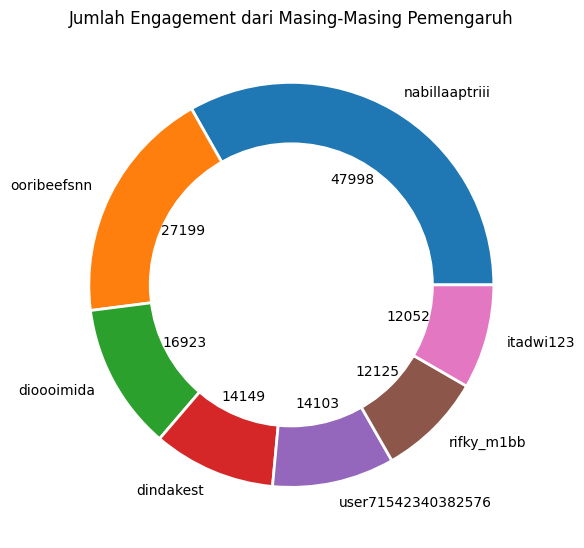

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan nilai absolut (jumlah engagements)
def absolute_value(val):
    total = sum(dfp.head(7)['engagements'])
    return f"{int(round(val * total / 100))}"

# Ambil 7 besar username dan engagement
top7 = dfp.head(7)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    top7['engagements'],
    labels=top7['username'],
    autopct=absolute_value,
    startangle=0,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'}
)

# Buat pie chart jadi bentuk donut
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

# Judul grafik
plt.title('Jumlah Engagement dari Masing-Masing Pemengaruh')
plt.tight_layout()
plt.show()

Berdasarkan pie chart diatas, didapat informasi TOP 7 akun  pemengaruh yang kontra dengan dikeluarkannya Permen Komdigi No. 8 Tahun 2025 dengan engagement terbesar, yaitu:

* @nabillaaptriii
* @ooribeefsnn
* @dioooimida
* @dindakest
* @user71542340382576
* @rifky_m1bb
* @itadwi123

# Kesimpulan

Kebijakan pengaturan diskon ongkir melalui Permen Komdigi No. 8 Tahun 2025 memicu reaksi publik yang mayoritas negatif (55%), karena adanya kekhawatiran bahwa biaya belanja online akan naik dan pendapatan kurir terdampak. Puncak perbincangan terjadi pada 20 Mei 2025, menunjukkan tingginya atensi publik dalam waktu singkat.

Meskipun sebagian kecil mendukung kebijakan ini sebagai peluang untuk toko offline kembali berjaya, sentimen negatif yang mendominasi dan kritik terhadap pemerintah mengindikasikan adanya kesenjangan antara tujuan kebijakan dan pemahaman masyarakat.

# Rekomendasi

* **Meningkatkan Kejelasan Tujuan Kebijakan**: Publik tampaknya membutuhkan pemahaman yang lebih baik tentang alasan di balik kebijakan ini. Penjelasan yang sederhana dan mudah dipahami dapat membantu mengurangi penolakan.
* **Memberikan Dukungan kepada Pekerja Logistik**: Ada kekhawatiran bahwa kebijakan ini memengaruhi mata pencaharian pekerja logistik. Pemerintah bisa mempertimbangkan bantuan atau insentif untuk menjaga stabilitas ekonomi mereka.
* **Mendorong Aktivitas Ekonomi Lokal**: Banyak yang melihat manfaat dari belanja di pasar tradisional atau toko offline. Inisiatif untuk memperkuat ekonomi lokal bisa menjadi solusi yang diterima masyarakat.
* **Menyediakan Alternatif untuk Konsumen**: Sebagian masyarakat mencari cara untuk tetap mendapatkan pengiriman terjangkau, seperti melalui program keanggotaan e-commerce. Pemerintah dapat bekerja sama dengan platform digital untuk menawarkan opsi serupa.
* **Merespons Kritik dengan Dialog**: Ada ketidakpuasan terhadap cara kebijakan ini diterapkan. Membuka ruang diskusi dengan masyarakat dapat membantu meredam ketidaksetujuan dan membangun kepercayaan.
* **Memantau Dampak Secara Berkala**: Reaksi masyarakat tampak berubah seiring waktu. Dengan terus memantau dan menyesuaikan langkah, pemerintah dapat lebih responsif terhadap kebutuhan masyarakat.